Download the Dataset
Download the Dataset from the following link:
https://www.kaggle.com/binovi/wholesale-customers-data-set

In [40]:
import pandas as pd
import numpy as np

In [41]:
Wholesale = pd.read_csv('Wholesale customers data.csv')

Reading the Dataset
Read the dataset into a Pandas DataFrame!
Does the dataset include any missing values? If so, drop them!
Hint: Pandas can do that with one line of code!

In [42]:
np.where(pd.isnull(Wholesale)) #means no null cell

(array([], dtype=int64), array([], dtype=int64))

In [44]:
Wholesale = Wholesale.dropna()

Feature Selection
Either exclude the Channel and Region from the considered features or think of a way to make them meaningfully impact the analysis.
Hint: Directly using the provided numerical values for Regions is not very wise and can skew the resulting clustering!

In [51]:
selected_X = Wholesale.drop(['Channel', 'Region'], axis = 1).values

In [52]:
selected_X

array([[12669,  9656,  7561,   214,  2674,  1338],
       [ 7057,  9810,  9568,  1762,  3293,  1776],
       [ 6353,  8808,  7684,  2405,  3516,  7844],
       ...,
       [14531, 15488, 30243,   437, 14841,  1867],
       [10290,  1981,  2232,  1038,   168,  2125],
       [ 2787,  1698,  2510,    65,   477,    52]])

Preprocessing
Perform any needed pre-processing on the chosen features including:
Scaling;
Encoding; and
Dealing with Nan values.
Hint: Use only the preprocessing steps you think useful.

In [54]:
#you can do LabelEncoder for Channel or Regions if you want
from sklearn.preprocessing import StandardScaler
encoded_X = StandardScaler().fit_transform(selected_X)

In [55]:
encoded_X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

Clustering Using K-Means
Use a k-means instance to cluster the data.
Choose different values of k for the K-means algorithm.
Try to visualize the elbow-curve and decide from it the best k and print it.
Clustering Metrics
Print the inertia every time you try a different value for k.

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

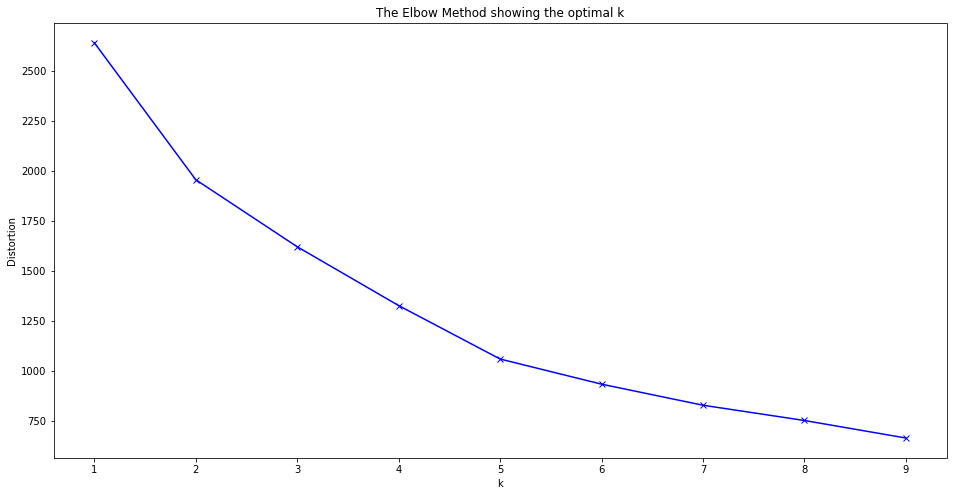

In [75]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline 
#We can easily run K-Means for a range of clusters using a for loop and 
#collecting the distortions into a list.
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(encoded_X)
    distortions.append(kmeanModel.inertia_)
#Plotting the distortions of K-Means
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-') #bx- means blue x marker and solid line
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')


In [76]:
#We can observe that the “elbow” is the number 5 which is optimal for this case. 
#Now we can run a K-Means using as n_clusters the number 3.
kmeanModel = KMeans(n_clusters=5)
kmeanModel.fit(encoded_X)
clusters = kmeanModel.predict(encoded_X)
print(kmeanModel.inertia_)

1058.77125325701


Download the Dataset
Download some of the images in the following link:
https://homepages.cae.wisc.edu/~ece533/images/
Hint: fruits.png, cat.png and baboon.png are good examples.

Reading an image
Read an image using matplotlib.
Hint: You can use any alternative library for reading images. Check out OpenCV, skimage, etc.

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
fruits = cv2.imread('fruits.png')
cat = cv2.imread('cat.png')
baboon = cv2.imread('baboon.png')
#Convert to RGB
fruits = cv2.cvtColor(fruits, cv2.COLOR_BGR2RGB)
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2RGB)
baboon = cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)

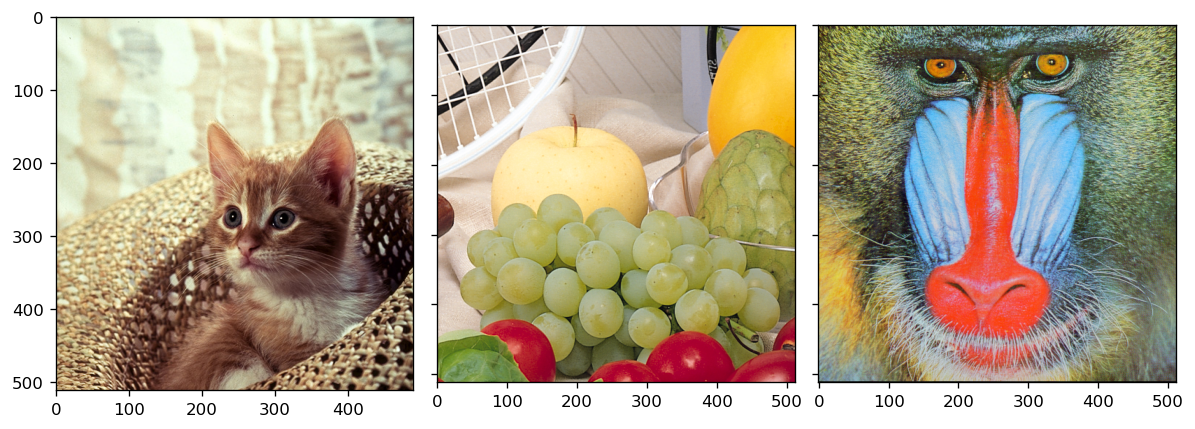

In [43]:
#show the image
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,4), sharey=True, dpi=120)

ax1.imshow(cat)
ax2.imshow(fruits)
ax3.imshow(baboon)

plt.tight_layout()
plt.show()

Re-organize
Re-organize the pixels as a 2D array with dimensions (number of pixels, 3).
In other words, a dataset with number of pixels samples and 3 columns.

You need to use np.transpose to rearrange dimensions. Now, n x m x 3 is to be converted to 3 x (n*m), so send the last axis to the front and shift right the order of the remaining axes (0,1). Finally , reshape to have 3 rows. Thus, the implementation would be

https://stackoverflow.com/questions/32838802/numpy-with-python-convert-3d-array-to-2d

organized_cat = cat.transpose(2,0,1).reshape(-1,3) 
organized_fruits = fruits.transpose(2,0,1).reshape(-1, 3) 
organized_baboon = baboon.transpose(2,0,1).reshape(-1,3)
#The length of the dimension set to -1 is automatically determined 
#by inferring from the specified values of other dimensions. This is useful when converting a large array shape

We gonna use cv2.kmeans() function which takes a 2D array as input, and since our original image is 3D (width, height and depth of 3 RGB values), we need to flatten the height and width into a single vector of pixels (3 RGB values):
https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python

In [46]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
fruits_pixel_values = fruits.reshape((-1, 3))
cat_pixel_values = cat.reshape((-1, 3))
baboon_pixel_values = baboon.reshape((-1, 3))
# convert to float
fruits_pixel_values = np.float32(fruits_pixel_values)
cat_pixel_values = np.float32(cat_pixel_values)
baboon_pixel_values = np.float32(baboon_pixel_values)
#print(pixel_values.shape)
print(fruits_pixel_values.shape)
print(cat_pixel_values.shape)
print(baboon_pixel_values.shape)

(262144, 3)
(359170, 3)
(262144, 3)


Clustering Use K-means to cluster the data into 10 clusters. Replace each pixel by its cluster center. Re-organize the pixels into a 3D array to show the image. Question: What happens to the compressed image if k increases?

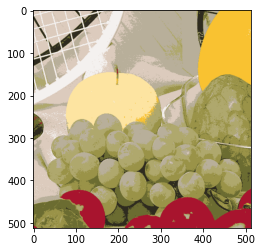

In [54]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 10
_, labels, (centers) = cv2.kmeans(fruits_pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(fruits.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

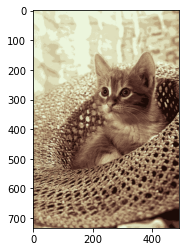

In [55]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 10
_, labels, (centers) = cv2.kmeans(cat_pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(cat.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

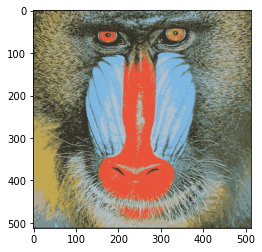

In [56]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
# number of clusters (K)
k = 10
_, labels, (centers) = cv2.kmeans(baboon_pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(baboon.shape)
# show the image
plt.imshow(segmented_image)
plt.show()